**This notebook is an exercise in the [Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/missing-values).**

---


Now it's your turn to test your new knowledge of **missing values** handling. You'll probably find it makes a big difference.

# Setup

The questions will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
# Set up code checking
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 
from learntools.core import binder
binder.bind(globals())
from learntools.ml_intermediate.ex2 import *
print("Setup Complete")

Setup Complete


In this exercise, you will work with data from the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course). 

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`.  The test set is loaded in `X_test`.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('../input/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll use only numerical predictors
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

Use the next code cell to print the first five rows of the data.

In [3]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,20,90.0,11694,9,5,2007,2007,452.0,48,0,...,774,0,108,0,0,260,0,0,7,2007
871,20,60.0,6600,5,5,1962,1962,0.0,0,0,...,308,0,0,0,0,0,0,0,8,2009
93,30,80.0,13360,5,7,1921,2006,0.0,713,0,...,432,0,0,44,0,0,0,0,8,2009
818,20,NaN,13265,8,5,2002,2002,148.0,1218,0,...,857,150,59,0,0,0,0,0,7,2008
303,20,118.0,13704,7,5,2001,2002,150.0,0,0,...,843,468,81,0,0,0,0,0,1,2006


In [4]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,956.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.605308,69.614017,10589.672945,6.086473,5.572774,1970.890411,1984.692637,103.481067,439.890411,45.571918,...,473.632705,94.498288,48.044521,23.022260,3.218322,14.528253,2.118151,50.936644,6.301370,2007.819349
std,42.172322,22.946069,10704.180793,1.367472,1.116908,30.407486,20.684612,182.676225,435.106803,156.229962,...,209.442320,127.312017,68.619199,63.153093,27.916593,54.009608,36.482294,550.380636,2.725977,1.335971
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7589.500000,5.000000,5.000000,1953.750000,1966.000000,0.000000,0.000000,0.000000,...,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9512.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,379.500000,0.000000,...,477.500000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,167.750000,716.000000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1120.000000,...,1390.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [5]:
# X_train.info()

You can already see a few missing values in the first several rows.  In the next step, you'll obtain a more comprehensive understanding of the missing values in the dataset.

# Step 1: Preliminary investigation

Run the code cell below without changes.

In [6]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1168, 36)
LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64


In [7]:
# X_train.isnull().sum()
X_train.isnull().sum().sum()

276

In [8]:
missing_columns = X_train.isnull().sum(axis=0)
total_missing_columns = (missing_columns > 0).sum()

print("Total number of missing columns in data:", total_missing_columns)

Total number of missing columns in data: 3


In [9]:
# # X_train.isnull().sum(axis=0).sum()
# X_train.isnull().sum(axis=0).sum(axis=0)
((X_train.isnull().sum(axis=0))>0).sum()

3

In [10]:
import missingno as msno

<AxesSubplot:>

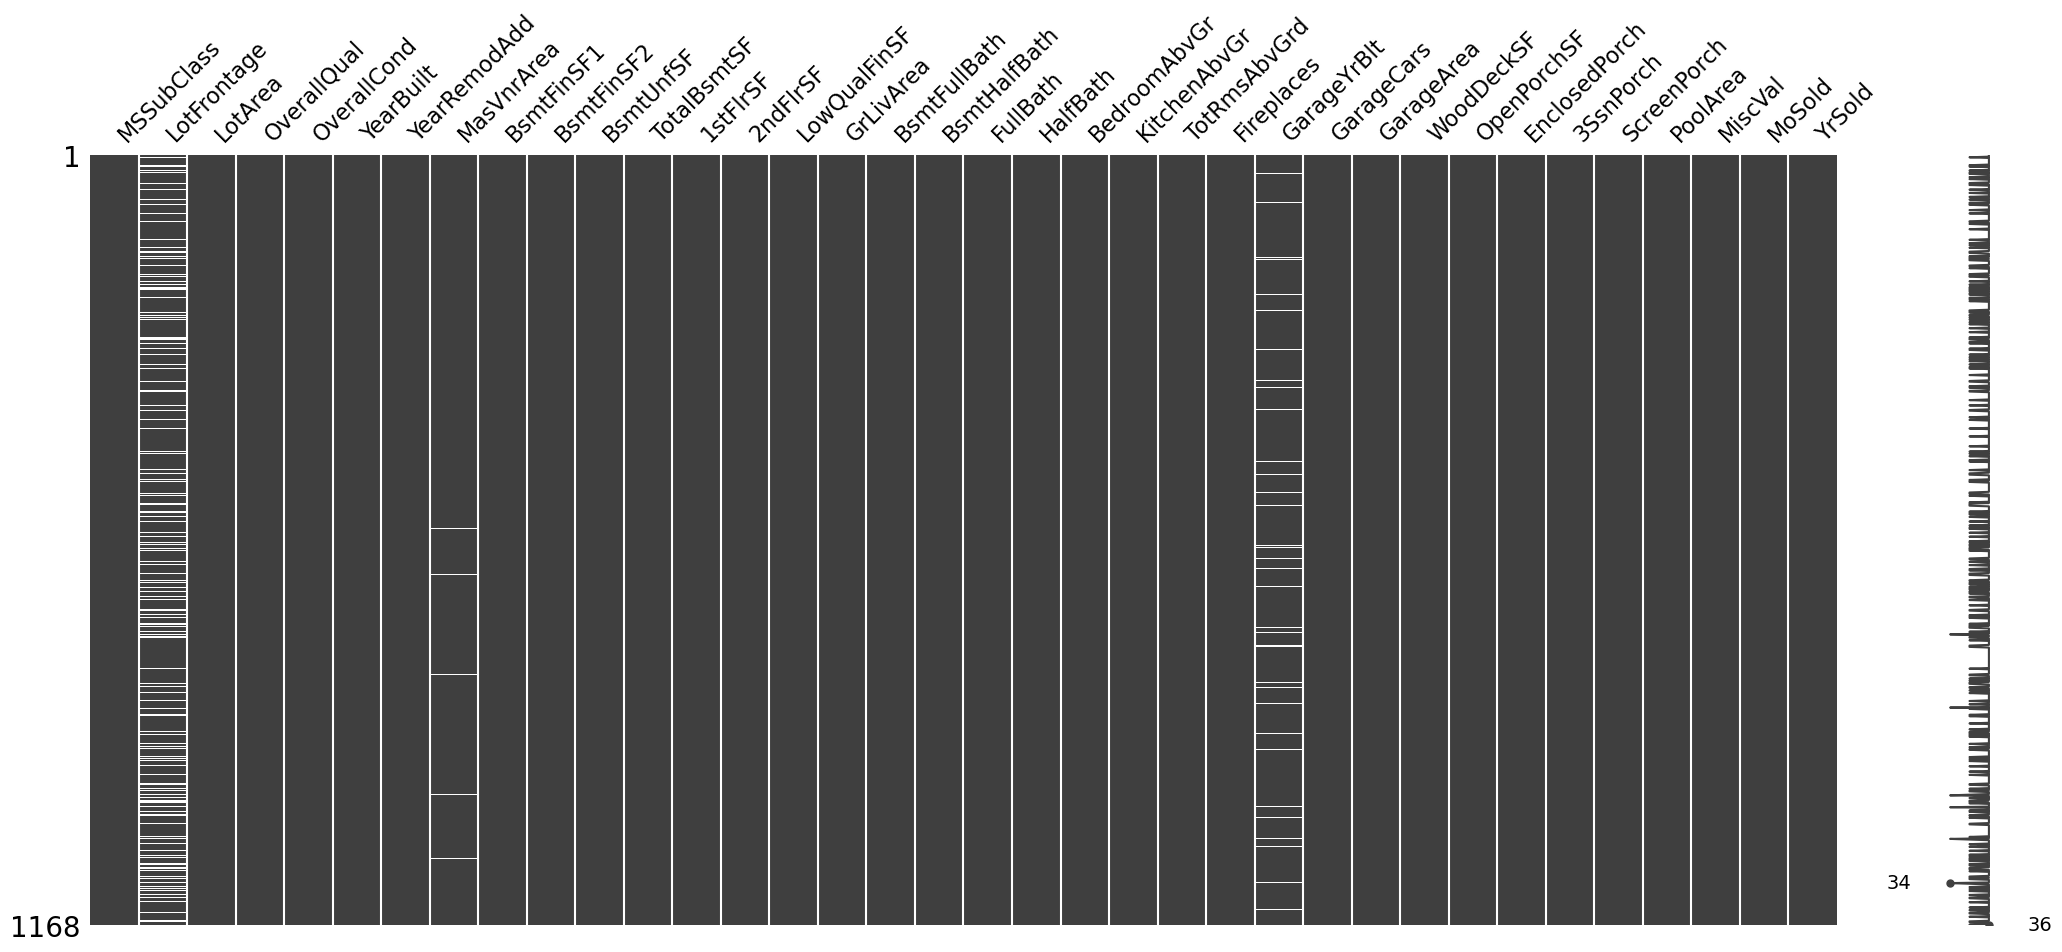

In [11]:
# msno.bar(X_train)
# msno.heatmap(X_train)
# msno.dendrogram(X_train)

msno.matrix(X_train)

### Part A

Use the above output to answer the questions below.

In [12]:
# Fill in the line below: How many rows are in the training data?
num_rows = X_train.shape[0] #1168 

# Fill in the line below: How many columns in the training data
# have missing values?
num_cols_with_missing = 3 #missing_columns = ((X_train.isnull().sum(axis=0))>0).sum() ## total_missing_columns = (missing_columns > 0).sum()


# Fill in the line below: How many missing entries are contained in 
# all of the training data?
tot_missing = X_train.isnull().sum().sum() #276

# Check your answers
step_1.a.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [13]:
# Lines below will give you a hint or solution code
step_1.a.hint()
step_1.a.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use the output of `X_train.shape` to get the number of rows and columns in the training data.  The `missing_val_count_by_column` Series has an entry for each column in the data, and the output above prints the number of missing entries for each column with at least one missing entry.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# How many rows are in the training data?
num_rows = 1168

# How many columns in the training data have missing values?
num_cols_with_missing = 3

# How many missing entries are contained in all of the training data?
tot_missing = 212 + 6 + 58

```

### Part B
Considering your answers above, what do you think is likely the best approach to dealing with the missing values?

**Ans:** I think just dropping the columns would be bad because its there are few missing values, so imputing them with any method would be better.

In [14]:
# Check your answer (Run this code cell to receive credit!)
step_1.b.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Since there are relatively few missing entries in the data (the column with the greatest percentage of missing values is missing less than 20% of its entries), we can expect that dropping columns is unlikely to yield good results.  This is because we'd be throwing away a lot of valuable data, and so imputation will likely perform better.

In [15]:
step_1.b.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Does the dataset have a lot of missing values, or just a few?  Would we lose much information if we completely ignored the columns with missing entries?

To compare different approaches to dealing with missing values, you'll use the same `score_dataset()` function from the tutorial.  This function reports the [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) (MAE) from a random forest model.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=190, criterion='absolute_error', random_state=0)

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid, model = model):
#     model = RandomForestRegressor(n_estimators=100, random_state=0)
#     model = RandomForestRegressor(n_estimators=190, criterion='absolute_error', random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# Step 2: Drop columns with missing values

In this step, you'll preprocess the data in `X_train` and `X_valid` to remove columns with missing values.  Set the preprocessed DataFrames to `reduced_X_train` and `reduced_X_valid`, respectively.  

In [17]:
# Fill in the line below: get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()] # Your code here

# Fill in the lines below: drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

# Check your answers
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [18]:
# Lines below will give you a hint or solution code
step_2.hint()
step_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Begin by finding the list of columns in the data with missing values.  Then, drop these columns in both the training and validation data with the `drop()` method.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

```

Run the next code cell without changes to obtain the MAE for this approach.

In [19]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE (Drop columns with missing values):
17787.695466834895


In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid, model = model ))

MAE (Drop columns with missing values):
17837.82570776256


# Step 3: Imputation

### Part A

Use the next code cell to impute missing values with the mean value along each column.  Set the preprocessed DataFrames to `imputed_X_train` and `imputed_X_valid`.  Make sure that the column names match those in `X_train` and `X_valid`.

In [21]:
from sklearn.impute import SimpleImputer

# Fill in the lines below: imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Fill in the lines below: imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

# Check your answers
step_3.a.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [22]:
# Lines below will give you a hint or solution code
step_3.a.hint()
step_3.a.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Begin by defining an instance of the `SimpleImputer()` class.  Then, use the imputer to fit and transform the training data, before transforming the validation data. Get the original column names from the original DataFrames `X_train` and `X_valid`.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

```

Run the next code cell without changes to obtain the MAE for this approach.

In [23]:
print("MAE (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE (Imputation):
17908.082588320118


### Part B

Compare the MAE from each approach.  Does anything surprise you about the results?  Why do you think one approach performed better than the other?

**Ans:** i thought imputation would perform better but it didnt

In [24]:
# Check your answer (Run this code cell to receive credit!)
step_3.b.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Given that thre are so few missing values in the dataset, we'd expect imputation to perform better than dropping columns entirely.  However, we see that dropping columns performs slightly better!  While this can probably partially be attributed to noise in the dataset, another potential explanation is that the imputation method is not a great match to this dataset.  That is, maybe instead of filling in the mean value, it makes more sense to set every missing value to a value of 0, to fill in the most frequently encountered value, or to use some other method.  For instance, consider the `GarageYrBlt` column (which indicates the year that the garage was built).  It's likely that in some cases, a missing value could indicate a house that does not have a garage.  Does it make more sense to fill in the median value along each column in this case?  Or could we get better results by filling in the minimum value along each column?  It's not quite clear what's best in this case, but perhaps we can rule out some options immediately - for instance, setting missing values in this column to 0 is likely to yield horrible results!

In [25]:
step_3.b.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Did removing missing values yield a larger or smaller MAE than imputation? Does this agree with the coding example from the tutorial?

# Step 4: Generate test predictions

In this final step, you'll use any approach of your choosing to deal with missing values.  Once you've preprocessed the training and validation features, you'll train and evaluate a random forest model.  Then, you'll preprocess the test data before generating predictions that can be submitted to the competition!

### Part A

Use the next code cell to preprocess the training and validation data.  Set the preprocessed DataFrames to `final_X_train` and `final_X_valid`.  **You can use any approach of your choosing here!**  in order for this step to be marked as correct, you need only ensure:
- the preprocessed DataFrames have the same number of columns,
- the preprocessed DataFrames have no missing values, 
- `final_X_train` and `y_train` have the same number of rows, and
- `final_X_valid` and `y_valid` have the same number of rows.

In [26]:
# cols_with_missing = [col for col in X_train.columns
#                      if X_train[col].isnull().any()]

# # Preprocessed training and validation features
# final_X_train = X_train.drop(cols_with_missing, axis=1)
# final_X_valid = X_valid.drop(cols_with_missing, axis=1)

# Imputation
final_imputer = SimpleImputer(strategy='constant',fill_value=0)
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(final_imputer.transform(X_valid))

# Imputation removed column names; put them back
final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

# Check your answers
step_4.a.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [27]:
# X_train.isnull().sum()

In [28]:
# Lines below will give you a hint or solution code
step_4.a.hint()
step_4.a.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use any approach of your choosing to deal with missing values in the data.  For inspiration, check out the code from the tutorial!

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Imputation
final_imputer = SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(final_imputer.transform(X_valid))

# Imputation removed column names; put them back
final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

```

Run the next code cell to train and evaluate a random forest model.  (*Note that we don't use the `score_dataset()` function above, because we will soon use the trained model to generate test predictions!*)

In [29]:
# Define and fit model
# model = RandomForestRegressor(n_estimators=100, random_state=0)
model = RandomForestRegressor(n_estimators=190, criterion='squared_error', random_state=0) # criterion : {"squared_error", "absolute_error", "poisson"}
model.fit(final_X_train, y_train)

# Get validation predictions and MAE
preds_valid = model.predict(final_X_valid)
print("MAE (Your approach):")
print(mean_absolute_error(y_valid, preds_valid))

MAE (Your approach):
17621.13579668349


### Part B

Use the next code cell to preprocess your test data.  Make sure that you use a method that agrees with how you preprocessed the training and validation data, and set the preprocessed test features to `final_X_test`.

Then, use the preprocessed test features and the trained model to generate test predictions in `preds_test`.

In order for this step to be marked correct, you need only ensure:
- the preprocessed test DataFrame has no missing values, and
- `final_X_test` has the same number of rows as `X_test`.

In [30]:
# # Fill in the line below: preprocess test data
# final_X_test = X_test.drop(cols_with_missing, axis=1)

# # Fill in the line below: get test predictions
# preds_test = model.predict(X_test)

# Preprocess test data
final_X_test = pd.DataFrame(final_imputer.transform(X_test))
final_X_test.columns = X_test.columns

# Get test predictions
preds_test = model.predict(final_X_test)

# Check your answers
step_4.b.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [31]:
# Lines below will give you a hint or solution code
step_4.b.hint()
step_4.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> After preprocessing the test data, you can get the model's predictions by using `model.predict()`.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Preprocess test data
final_X_test = pd.DataFrame(final_imputer.transform(X_test))

# Get test predictions
preds_test = model.predict(final_X_test)

```

Run the next code cell without changes to save your results to a CSV file that can be submitted directly to the competition.

In [32]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

# Submit your results

Once you have successfully completed Step 4, you're ready to submit your results to the leaderboard!  (_You also learned how to do this in the previous exercise.  If you need a reminder of how to do this, please use the instructions below._)  

First, you'll need to join the competition if you haven't already.  So open a new window by clicking on [this link](https://www.kaggle.com/c/home-data-for-ml-course).  Then click on the **Join Competition** button.

![join competition image](https://i.imgur.com/wLmFtH3.png)

Next, follow the instructions below:
1. Begin by clicking on the **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Output** tab on the right of the screen.  Then, click on the file you would like to submit, and click on the **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.


# Keep going

Move on to learn what **[categorical variables](https://www.kaggle.com/alexisbcook/categorical-variables)** are, along with how to incorporate them into your machine learning models.  Categorical variables are very common in real-world data, but you'll get an error if you try to plug them into your models without processing them first!

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intermediate-machine-learning/discussion) to chat with other learners.*